In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

drug = pd.read_csv('drug200.csv')

In [259]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [260]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [261]:
drug['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [262]:
#Colocando os rótulos em ordem sequencial, para facilitar o trabalho no futuro
rotulos_mapper = {"drugX":"drugD", "DrugY":"drugE"}
drug['Drug'] = drug['Drug'].replace(rotulos_mapper)
drug['Drug'].value_counts()

drugE    91
drugD    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

### Visualizando os dados

<AxesSubplot:xlabel='Age', ylabel='Count'>

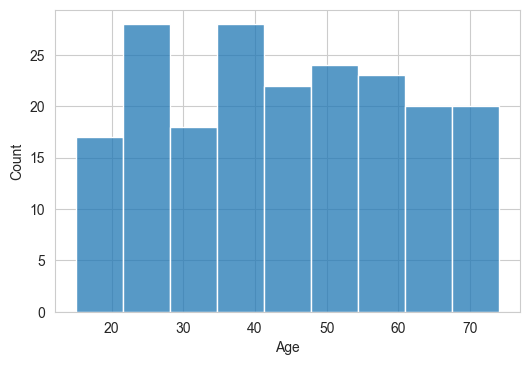

In [263]:
import seaborn as sns
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
sns.set_style('whitegrid')
sns.histplot(drug['Age'])

<AxesSubplot:xlabel='Sex', ylabel='Count'>

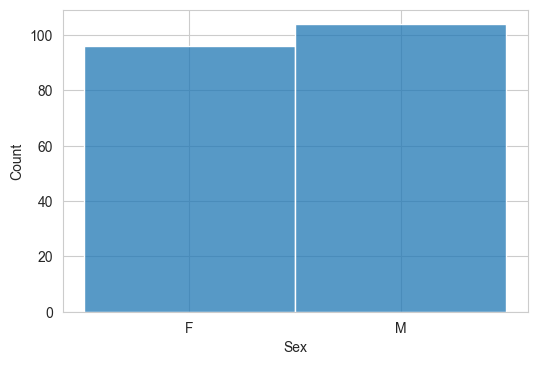

In [264]:
sns.histplot(drug['Sex'])

<AxesSubplot:xlabel='BP', ylabel='Count'>

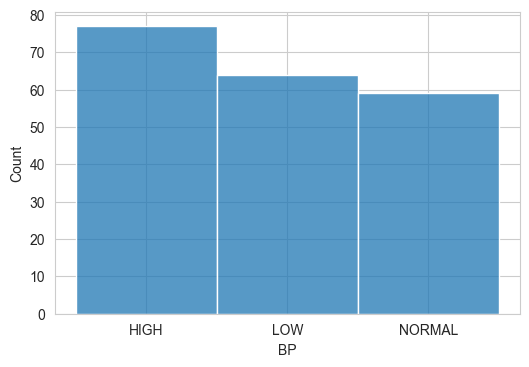

In [265]:
sns.histplot(drug['BP'])

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

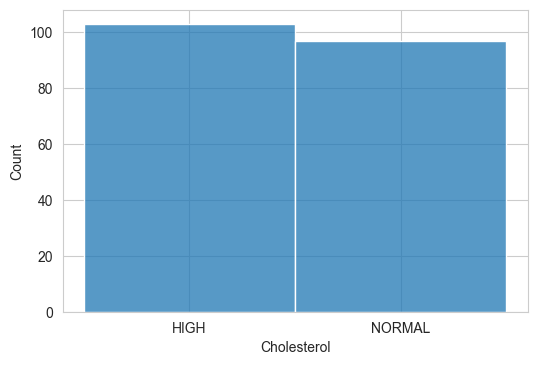

In [266]:
sns.histplot(drug['Cholesterol'])

<AxesSubplot:xlabel='Na_to_K', ylabel='Count'>

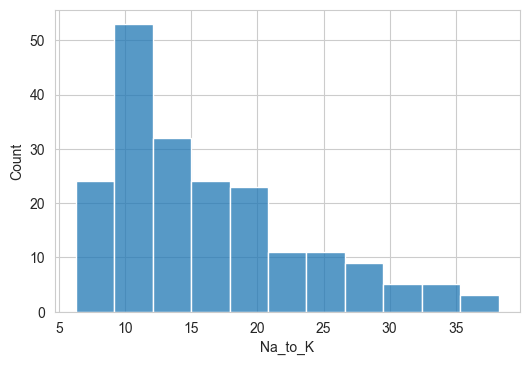

In [267]:
sns.histplot(drug['Na_to_K'])

<AxesSubplot:xlabel='Drug', ylabel='Count'>

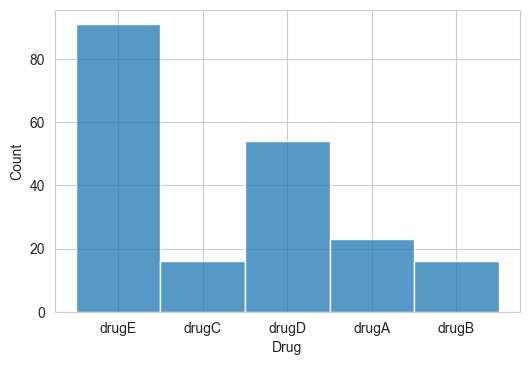

In [268]:
sns.histplot(drug['Drug'])

### Preparando os dados

In [269]:
#Transformando features categóricas em numéricas

#Um tipo de LabelEncoder
drug['BP'] = drug['BP'].apply(lambda x: ['LOW', 'NORMAL', 'HIGH'].index(x))
drug['Cholesterol'] = drug['Cholesterol'].apply(lambda x: ['NORMAL', 'HIGH'].index(x))
drug['Drug'] = drug['Drug'].apply(lambda x: ['drugA', 'drugB', 'drugC', 'drugD', 'drugE'].index(x))

#One-hot encoding do sexo
one_hot_encoding = pd.get_dummies(drug[['Sex']])
drug = drug.drop(['Sex'], axis = 1)
drug = pd.concat([drug, one_hot_encoding], axis=1)

In [270]:
drug.head()

,Age,BP,Cholesterol,Na_to_K,Drug,Sex_F,Sex_M
0,23,2,1,25.355,4,1,0
1,47,0,1,13.093,2,0,1
2,47,0,1,10.114,2,0,1
3,28,1,1,7.798,3,1,0
4,61,0,1,18.043,4,1,0


BP:\
0 - LOW\
1 - NORMAL\
2 - HIGH

Cholesterol:\
0 - NORMAL\
1 - HIGH

Drug:\
0 - drugA\
1 - drugB\
2 - drugC\
3 - drugD\
4 - drugE

In [271]:
drug.head()

,Age,BP,Cholesterol,Na_to_K,Drug,Sex_F,Sex_M
0,23,2,1,25.355,4,1,0
1,47,0,1,13.093,2,0,1
2,47,0,1,10.114,2,0,1
3,28,1,1,7.798,3,1,0
4,61,0,1,18.043,4,1,0


### Treinamento e avaliação

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(drug, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

160 train + 40 test


In [273]:
y_train, y_test = train_set['Drug'], test_set['Drug']

In [274]:
x_train, x_test = train_set.drop(['Drug'], axis=1), test_set.drop(['Drug'], axis=1)
x_train.head()

,Age,BP,Cholesterol,Na_to_K,Sex_F,Sex_M
79,32,0,0,10.840,1,0
197,52,1,1,9.894,0,1
38,39,1,0,9.709,1,0
24,33,0,1,33.486,1,0
122,34,1,1,22.456,0,1


In [383]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, max_iter=5000)
softmax_reg.fit(x_train, y_train)

LogisticRegression(C=10, max_iter=5000, multi_class='multinomial')

In [384]:
resultados_proba = softmax_reg.predict_proba(x_test)
resultados = softmax_reg.predict(x_test)

In [385]:
from sklearn.metrics import r2_score
print(r2_score(y_test, resultados))

1.0


In [402]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_text
tree_regressor = DecisionTreeRegressor(random_state=42, max_depth=4)
tree_regressor.fit(x_train, y_train)
resultado_arvore = tree_regressor.predict(x_test)
print(r2_score(y_test, resultado_arvore))

1.0


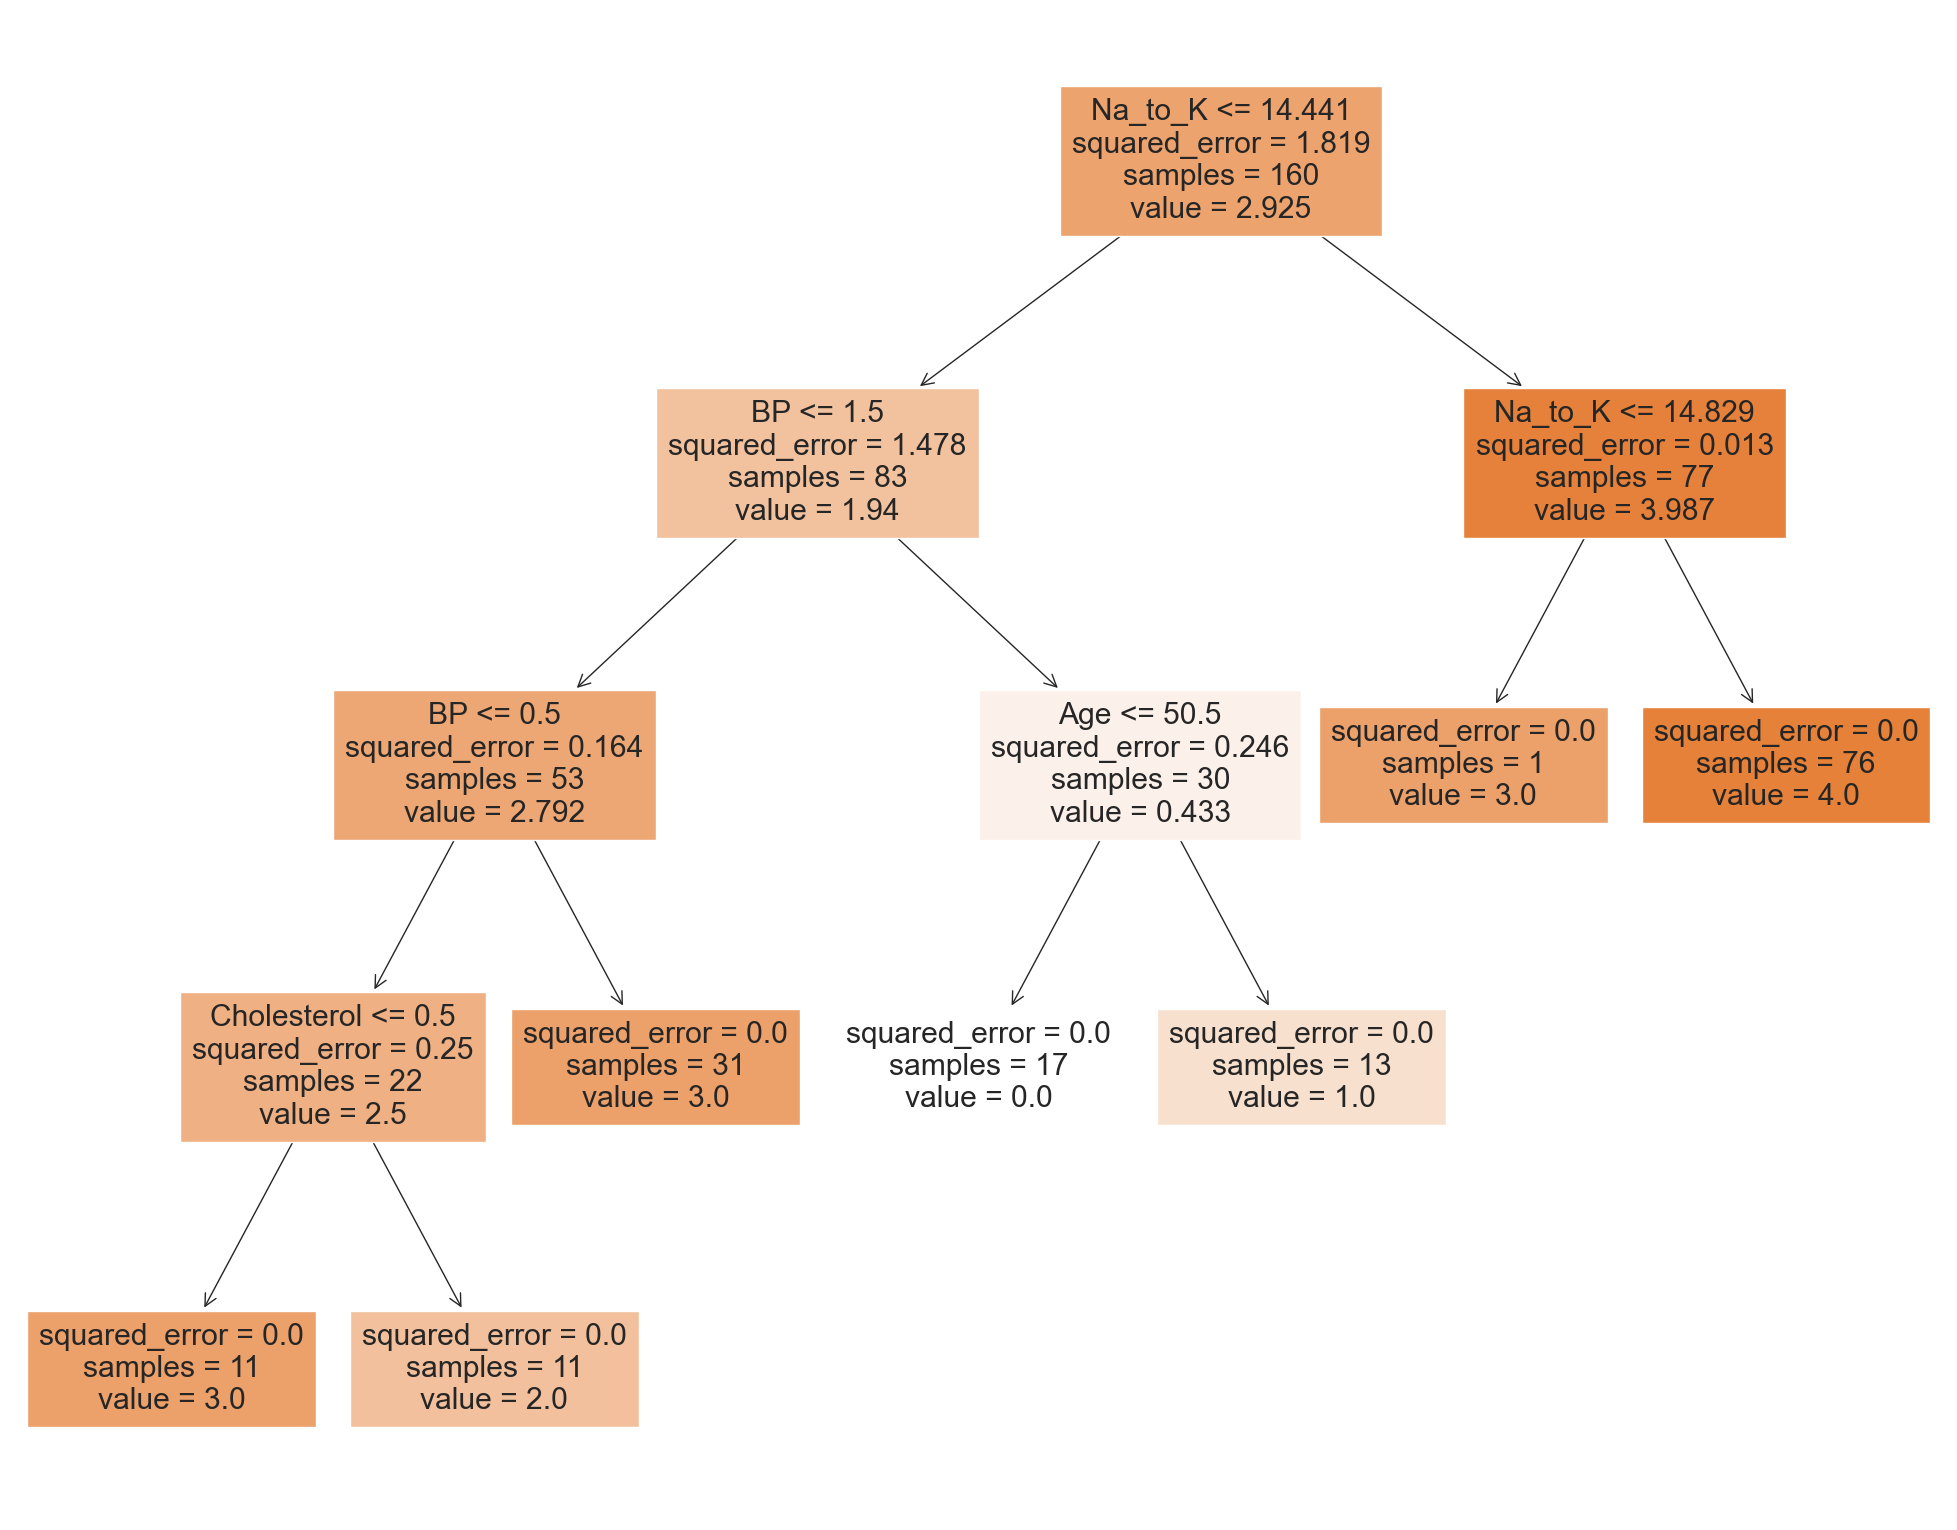

In [279]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree_regressor, feature_names=x_train.columns, filled=True)
fig.savefig('decision_tree.pdf')

c:\users\pc gamer\appdata\local\programs\python\python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


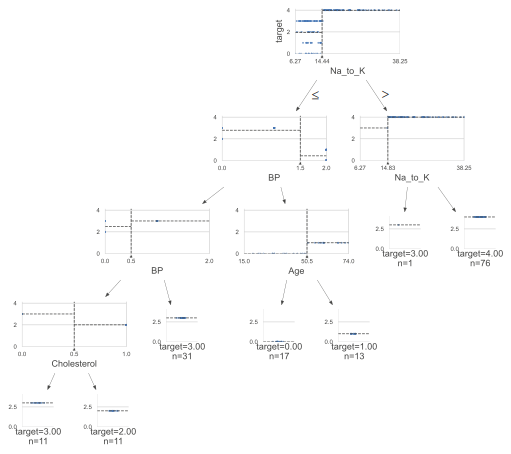

In [280]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(tree_regressor, x_train, y_train,
                target_name="target",
                feature_names=x_train.columns)
viz.save("decision_tree.svg")
viz

In [311]:
from sklearn.metrics import f1_score
print('Micro da SoftMax:', f1_score(y_test, resultados, average='micro'))
print('Macro da SoftMax:', f1_score(y_test, resultados, average='macro'))

Micro da SoftMax: 1.0
Macro da SoftMax: 1.0


In [303]:
print('Micro da Árvore:', f1_score(y_test, resultado_arvore, average='micro'))
print('Macro da Árvore:', f1_score(y_test, resultado_arvore, average='macro'))

Micro da Árvore: 1.0
Macro da Árvore: 1.0


### Curvas de aprendizado

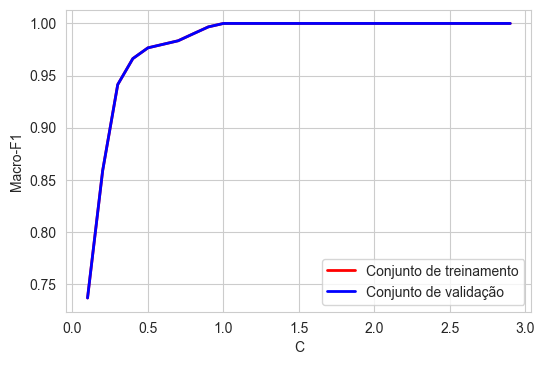

In [414]:
from sklearn.metrics import mean_squared_error
def plot_learning_curves_softmax_regressor(X, y, max_C):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)
    train_errors, val_errors = [], []
    for c in np.arange(0.1, max_C, 0.1):
        model = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=c, max_iter=5000)
        model.fit(X_train, y_train)
        y_train_predict = model.predict(X_train)
        y_val_predict = model.predict(X_val)
        train_errors.append(f1_score(y_train_predict, y_train, average='macro'))
        val_errors.append(f1_score(y_train_predict, y_train, average='macro'))
    plt.xlabel("C")
    plt.ylabel("Macro-F1")
    plt.plot(np.arange(0.1, max_C, 0.1), train_errors, "r-", linewidth=2, label="Conjunto de treinamento")
    plt.plot(np.arange(0.1, max_C, 0.1), val_errors, "b-", linewidth=2, label="Conjunto de validação")
    plt.legend()

plot_learning_curves_softmax_regressor(pd.concat([x_train, x_test]), pd.concat([y_train, y_test]), 3)

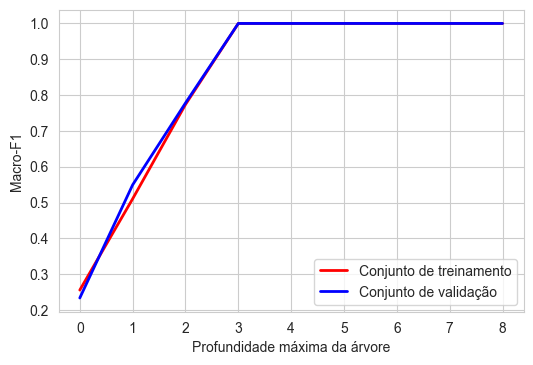

In [433]:
def plot_learning_curves_tree(X, y, max_depth):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for max in range(1, max_depth):
        model = DecisionTreeRegressor(random_state=42, max_depth=max)
        model.fit(X_train, y_train)
        y_train_predict = model.predict(X_train)
        y_val_predict = model.predict(X_val)
        train_errors.append(f1_score(y_train, np.round(y_train_predict), average='macro'))
        val_errors.append(f1_score(y_val, np.round(y_val_predict), average='macro'))
    plt.xlabel("Profundidade máxima da árvore")
    plt.ylabel("Macro-F1")
    plt.plot(train_errors, "r-", linewidth=2, label="Conjunto de treinamento")  
    plt.plot(val_errors, "b-", linewidth=2, label="Conjunto de validação")
    plt.legend()

plot_learning_curves_tree(pd.concat([x_train, x_test]), pd.concat([y_train, y_test]), 10)

In [359]:
#Aplicação do 3-Fold Cross-Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=3,random_state=42,shuffle=True)

In [360]:
scores = cross_val_score(DecisionTreeRegressor(random_state=42, max_depth=4),x_train,y_train,scoring='r2',cv=cv)
print("Scores Árvore:", scores)
print("Média Árvore:", scores.mean())
print("Desvio padrão Árvore:", scores.std())

Scores Árvore: [1.         0.93536585 1.        ]
Média Árvore: 0.9784552845528456
Desvio padrão Árvore: 0.030468828782835


In [370]:
scores = cross_val_score(
LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, max_iter=5000),x_train,y_train,scoring='r2',cv=cv)
print("Scores SoftMax:", scores)
print("Média SoftMax:", scores.mean())
print("Desvio padrão Softmax:", scores.std())

Scores SoftMax: [0.71687321 0.97845528 0.91511851]
Média SoftMax: 0.8701490036364935
Desvio padrão Softmax: 0.11142407796464938
